# DATA PROCESSING BASLAR

## FDI ve CROP CLASSIFICATION

In [6]:
import pandas as pd
# Load datasets
fdi_data_path = "Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv"
crops_data_path = "Crops production indicators - FAOSTAT_data_en_2-22-2024.csv"

# read them all
fdi_data = pd.read_csv(fdi_data_path)
crops_data = pd.read_csv(crops_data_path)

# show a few rows
fdi_data_head = fdi_data.head()
crops_data_head = crops_data.head()

fdi_data_head, crops_data_head

(  Domain Code                           Domain  Area Code (M49)         Area  \
 0         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
 1         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
 2         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
 3         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
 4         FDI  Foreign Direct Investment (FDI)                4  Afghanistan   
 
    Element Code    Element  Item Code               Item  Year Code  Year  \
 0          6110  Value US$      23082  Total FDI inflows       2000  2000   
 1          6110  Value US$      23082  Total FDI inflows       2001  2001   
 2          6110  Value US$      23082  Total FDI inflows       2002  2002   
 3          6110  Value US$      23082  Total FDI inflows       2003  2003   
 4          6110  Value US$      23082  Total FDI inflows       2004  2004   
 
           Unit   Value Flag              

In [10]:
pip install --upgrade threadpoolctl scikit-learn

  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

# clean the FDI data and calculate the annual total investment amounts.
fdi_annual_totals = fdi_data.groupby(['Area', 'Year'])['Value'].sum().reset_index()

# Calculate efficiency average for crops products
crops_yield_avg = crops_data.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# merged them
fdi_and_crops_data = pd.merge(fdi_annual_totals, crops_yield_avg, on=['Area', 'Year'], how='inner')
fdi_and_crops_data.columns = ['Country', 'Year', 'FDI_Million_USD', 'Crop_Yield_Per_100ha']

# prepare for K-means classification
# scale them
scaler = StandardScaler()
cluster_fdi_and_crops_data = fdi_and_crops_data[['FDI_Million_USD', 'Crop_Yield_Per_100ha']]
cluster_scaled = scaler.fit_transform(cluster_fdi_and_crops_data)

# It is picked "3" model will find the most suitable cluster classifications. "3" means we will have three different clusters
kmeans = KMeans(n_clusters=3, random_state=42)
fdi_and_crops_data['Cluster'] = kmeans.fit_predict(cluster_scaled)

# the clustering results
last_data = fdi_and_crops_data.groupby('Cluster').agg({
    'FDI_Million_USD': ['mean', 'min', 'max'],
    'Crop_Yield_Per_100ha': ['mean', 'min', 'max'],
    'Country': 'nunique'
}).reset_index()

last_data

Cluster FDI_Million_USD                               Crop_Yield_Per_100ha  \
                     mean            min            max                 mean   
0       0    19214.605507 -154408.351498  143694.949550        165002.825550   
1       1     2292.810778 -587006.015000  145188.822030         74754.017415   
2       2   271175.249239  149901.338530  786233.500832        165057.833024   

                               Country  
            min            max nunique  
0  92129.272727  718138.000000     103  
1    535.500000  128756.857143     159  
2  71514.600000  308722.166667      15

In [11]:
fdi_and_crops_data

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster
0,Afghanistan,2000,0.17000,60177.909091,1
1,Afghanistan,2001,0.68000,60701.272727,1
2,Afghanistan,2002,50.00000,61135.363636,1
3,Afghanistan,2003,58.80000,61209.181818,1
4,Afghanistan,2004,186.20000,61449.454545,1
...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.818182,1
4313,Zimbabwe,2019,312.00000,97301.000000,1
4314,Zimbabwe,2020,227.00000,96519.272727,1
4315,Zimbabwe,2021,282.00000,95493.181818,1


In [49]:
fdi_and_crops_data.to_csv("[1][1]fdi_and_crops_data.csv",index=False)

# CPI ve Exchange ile veri sınıflandırması (4)

In [36]:
import pandas as pd


exchange_rate_path = 'Exchange rate - FAOSTAT_data_en_2-22-2024.csv'
consumer_prices_path = 'Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv'


exchange_rate_data = pd.read_csv(exchange_rate_path)
consumer_prices_data = pd.read_csv(consumer_prices_path)

exchange_rate_data.head(), consumer_prices_data.head()

(  Domain Code          Domain  Area Code (M49)         Area  \
 0          PE  Exchange rates                4  Afghanistan   
 1          PE  Exchange rates                4  Afghanistan   
 2          PE  Exchange rates                4  Afghanistan   
 3          PE  Exchange rates                4  Afghanistan   
 4          PE  Exchange rates                4  Afghanistan   
 
   ISO Currency Code (FAO) Currency Element Code                       Element  \
 0                     AFA  Afghani          LCU  Local currency units per USD   
 1                     AFA  Afghani          LCU  Local currency units per USD   
 2                     AFA  Afghani          LCU  Local currency units per USD   
 3                     AFA  Afghani          LCU  Local currency units per USD   
 4                     AFA  Afghani          LCU  Local currency units per USD   
 
    Year Code  Year  Months Code    Months  Unit      Value Flag  \
 0       1980  1980         7001   January   NaN  44

In [37]:
# Normalizing exchange rates to US dollars
exchange_rate_data['USD Exchange Rate'] = 1 / exchange_rate_data['Value']


exchange_rate_data[['Area', 'Year', 'Months', 'Value', 'USD Exchange Rate']].head()

,Area,Year,Months,Value,USD Exchange Rate
0,Afghanistan,1980,January,44.129167,0.022661
1,Afghanistan,1980,February,44.129167,0.022661
2,Afghanistan,1980,March,44.129167,0.022661
3,Afghanistan,1980,April,44.129167,0.022661
4,Afghanistan,1980,May,44.129167,0.022661


In [38]:
# To combine consumer price indices and exchange rate data, select the appropriate columns
dropped_exchange_rate_data = exchange_rate_data[['Area', 'Year', 'Months', 'USD Exchange Rate']]
dropped_consumer_prices_data = consumer_prices_data[['Area', 'Year', 'Months', 'Value']]

# merged two datasets, ortak via columns (Country, Year, Month)
merged_cpi_exchange = pd.merge(dropped_consumer_prices_data, dropped_exchange_rate_data, 
                       on=['Area', 'Year', 'Months'], 
                       how='inner')

merged_cpi_exchange.head()

,Area,Year,Months,Value,USD Exchange Rate
0,Afghanistan,2000,January,24.356332,0.000021
1,Afghanistan,2000,February,23.636242,0.000021
2,Afghanistan,2000,March,23.485345,0.000021
3,Afghanistan,2000,April,24.767194,0.000021
4,Afghanistan,2000,May,25.956912,0.000021


In [39]:
#the data in the form of a pivot table to calculate the percentage change of annual consumer price indices.
merged_cpi_exchange_pivot = merged_cpi_exchange.pivot_table(values='Value', index=['Area', 'Year'], columns='Months', aggfunc='mean')

# calculate the annual average consumer price index and find the percentage change by comparing it with the next year.
annual_cpi_change = merged_cpi_exchange_pivot.pct_change(axis='columns').mean(axis=1)

# add the percentage change to the data set
merged_cpi_exchange['Annual CPI Change'] = merged_cpi_exchange.apply(lambda row: annual_cpi_change.get((row['Area'], row['Year'])), axis=1)

# determine the inflation categories by looking at the percentage change
def classify_inflation(change):
    if change > 0.1:  # More than 10 percent increase high inflatio
        return 'High Inflation'
    elif change > 0.03:  # 3 to 10 percent increase medium inflation
        return 'Medium Inflation'
    else:  # Less than 3 percent increase, low inflation
        return 'Low Inflation'

# apply the classification to the data set
merged_cpi_exchange['Inflation Category'] = merged_cpi_exchange['Annual CPI Change'].apply(classify_inflation)


merged_cpi_exchange[['Area', 'Year', 'Annual CPI Change', 'USD Exchange Rate','Inflation Category']].dropna().head()

C:\Users\enesk\AppData\Local\Temp\ipykernel_18452\3032698106.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  annual_cpi_change = merged_cpi_exchange_pivot.pct_change(axis='columns').mean(axis=1)


,Area,Year,Annual CPI Change,USD Exchange Rate,Inflation Category
0,Afghanistan,2000,0.023717,0.000021,Low Inflation
1,Afghanistan,2000,0.023717,0.000021,Low Inflation
2,Afghanistan,2000,0.023717,0.000021,Low Inflation
3,Afghanistan,2000,0.023717,0.000021,Low Inflation
4,Afghanistan,2000,0.023717,0.000021,Low Inflation


In [40]:
# apply one hot encoding
onehot_inflation = pd.get_dummies(merged_cpi_exchange['Inflation Category'], prefix='Inflation')

# add one hot encoding results to the original data set
updated_cpi_exchange_data = pd.concat([merged_cpi_exchange, onehot_inflation], axis=1)


updated_cpi_exchange_data[['Area', 'Year', 'Inflation Category', 'Inflation_High Inflation', 'Inflation_Medium Inflation', 'Inflation_Low Inflation']].head()

,Area,Year,Inflation Category,Inflation_High Inflation,Inflation_Medium Inflation,Inflation_Low Inflation
0,Afghanistan,2000,Low Inflation,False,False,True
1,Afghanistan,2000,Low Inflation,False,False,True
2,Afghanistan,2000,Low Inflation,False,False,True
3,Afghanistan,2000,Low Inflation,False,False,True
4,Afghanistan,2000,Low Inflation,False,False,True


In [41]:
# To combine consumer price indices and exchange rate data, select usable columns
dropped_exchange_rate_data = exchange_rate_data[['Area', 'Year', 'Months', 'USD Exchange Rate']]
dropped_consumer_prices_data= consumer_prices_data[['Area', 'Year', 'Months', 'Value']]

# merged them via common columns (Country, Year, Month)
merged_cpi_exchange = pd.merge(dropped_consumer_prices_data, dropped_exchange_rate_data, 
                       on=['Area', 'Year', 'Months'], 
                       how='inner')


merged_cpi_exchange.head()

,Area,Year,Months,Value,USD Exchange Rate
0,Afghanistan,2000,January,24.356332,0.000021
1,Afghanistan,2000,February,23.636242,0.000021
2,Afghanistan,2000,March,23.485345,0.000021
3,Afghanistan,2000,April,24.767194,0.000021
4,Afghanistan,2000,May,25.956912,0.000021


In [44]:
updated_cpi_exchange_data.to_csv("updated_cpi_exchange_data.csv",index=False)

In [46]:

numeric_columns = updated_cpi_exchange_data.select_dtypes(include='number').columns.difference(['Year'])
numeric_yearly = updated_cpi_exchange_data.groupby(['Area', 'Year'])[numeric_columns].mean().reset_index()

# Find categorical and boolean columns
categorical_columns = updated_cpi_exchange_data.select_dtypes(include=['object', 'bool']).columns.difference(['Area', 'Months'])

# Find the mode of categorical valiables so that it will be obtained annual value of categorical and boolean datas for each Country and Year
for col in categorical_columns:
    mode_values = updated_cpi_exchange_data.groupby(['Area', 'Year'])[col].agg(lambda x: x.mode()[0]).reset_index()
    numeric_yearly = pd.merge(numeric_yearly, mode_values, on=['Area', 'Year'])

numeric_yearly.head()

,Area,Year,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation
0,Afghanistan,2000,0.023717,0.000021,26.629848,Low Inflation,False,True,False
1,Afghanistan,2001,-0.006813,0.000021,21.337120,Low Inflation,False,True,False
2,Afghanistan,2002,0.020315,0.019397,26.799704,Low Inflation,False,True,False
3,Afghanistan,2003,-0.017217,0.020518,27.152679,Low Inflation,False,True,False
4,Afghanistan,2004,0.020655,0.020933,29.956366,Low Inflation,False,True,False


In [50]:
numeric_yearly.to_csv("[2][2]updated_cpi_exchange_data.csv",index=False)

## FOOD TRADE INDICATOR HAZIRLAMAK

In [56]:
import pandas as pd


food_trade_indicator = pd.read_csv('Food trade indicators - FAOSTAT_data_en_2-22-2024.csv')
food_trade_indicator.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [57]:
# Examine the unique items to detect crop products
unique_items = food_trade_indicator['Item'].unique()
unique_items.sort()
unique_items


array(['Alcoholic Beverages', 'Cereals and Preparations',
       'Dairy Products and Eggs', 'Fats and Oils (excluding Butter)',
       'Fruit and Vegetables', 'Meat and Meat Preparations',
       'Non-alcoholic Beverages', 'Non-edible Fats and Oils', 'Non-food',
       'Other food', 'Sugar and Honey', 'Tobacco'], dtype=object)

In [58]:
food_trade_indicator = food_trade_indicator[food_trade_indicator['Element'] == 'Export Value']

In [60]:
#Crop products
agricultural_elements = [
    'Cereals and Preparations',"Tobacco",

    'Fats and Oils (excluding Butter)', 'Fruit and Vegetables',
     'Sugar and Honey'
]

# Apply filter
agricultural_food_trade_indicator = food_trade_indicator[food_trade_indicator['Item'].isin(agricultural_elements)]

# Grouping data by country and year, then summing the export values
agricultural_food_trade_indicators_grouped = agricultural_food_trade_indicator.groupby(['Area', 'Year'])['Value'].sum().reset_index()
agricultural_food_trade_indicators_grouped

,Area,Year,Value
0,Afghanistan,1991,51858.00
1,Afghanistan,1992,19062.00
2,Afghanistan,1993,21324.00
3,Afghanistan,1994,26907.00
4,Afghanistan,1995,24240.00
...,...,...,...
6094,Zimbabwe,2018,992306.64
6095,Zimbabwe,2019,949699.72
6096,Zimbabwe,2020,934703.99
6097,Zimbabwe,2021,919550.17


In [61]:
agricultural_food_trade_indicators_grouped.to_csv("[3][3]food_trade_indicator.csv",index=False)

# FERTILIZER VE LAND USE SINIFLANDIRMA

In [69]:

land_use_file_path = 'Land use - FAOSTAT_data_en_2-22-2024.csv'
land_use_data = pd.read_csv(land_use_file_path)
land_use_data.head()

C:\Users\enesk\AppData\Local\Temp\ipykernel_18452\160375489.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  land_use_data = pd.read_csv(land_use_file_path)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [70]:

fertilizers_file_path = 'Fertilizers use - FAOSTAT_data_en_2-27-2024.csv'
fertilizers_data = pd.read_csv(fertilizers_file_path)
fertilizers_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [71]:
# apply filter to data for 'Agricultural Use' category. Then, group by country and year and sum the values
fertilizers_agricultural_use = fertilizers_data[fertilizers_data['Element'] == 'Agricultural Use']
total_fertilizers_grouped = fertilizers_agricultural_use.groupby(['Area', 'Year'])['Value'].sum().reset_index()

total_fertilizers_grouped.head()

,Area,Year,Value
0,Afghanistan,2002,17900.0
1,Afghanistan,2003,33200.0
2,Afghanistan,2004,90000.0
3,Afghanistan,2005,20577.0
4,Afghanistan,2006,68253.0


In [72]:
# Filter the land use data for 'Agricultural land'
agricultural_land_data = land_use_data[land_use_data['Item'] == 'Agricultural land']

# Merge the total fertilizer use data with the agricultural land data
merged_agricultural_land_fertilizers = pd.merge(total_fertilizers_grouped, agricultural_land_data, 
                       left_on=['Area', 'Year'], right_on=['Area', 'Year'], how='left')

# Calculate the Agricultural Index Intensity by dividing them to each other
merged_agricultural_land_fertilizers['Agricultural Index Intensity'] = merged_agricultural_land_fertilizers['Value_x'] / merged_agricultural_land_fertilizers['Value_y'] * 1000  # per 1000 ha

# Select columns that will be used
final_agricultural_land_fertilizers = merged_agricultural_land_fertilizers[['Area', 'Year', 'Value_x', 'Value_y', 'Agricultural Index Intensity']]
final_agricultural_land_fertilizers.rename(columns={'Value_x': 'Fertilizer Use (t)', 'Value_y': 'Agricultural Land (1000 ha)'}, inplace=True)

final_agricultural_land_fertilizers.head()

C:\Users\enesk\AppData\Local\Temp\ipykernel_18452\3804563409.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_agricultural_land_fertilizers.rename(columns={'Value_x': 'Fertilizer Use (t)', 'Value_y': 'Agricultural Land (1000 ha)'}, inplace=True)


,Area,Year,Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity
0,Afghanistan,2002,17900.0,37790.0,473.670283
1,Afghanistan,2003,33200.0,37884.0,876.359413
2,Afghanistan,2004,90000.0,37928.0,2372.917106
3,Afghanistan,2005,20577.0,37917.0,542.685339
4,Afghanistan,2006,68253.0,37910.0,1800.395674


In [75]:
final_agricultural_land_fertilizers.to_csv("[4][4]agriculture_land_fertilizers.csv",index=False)

# FOOD BALANCE VE EMPLOYMENT KULLANIMI

## TARIM TICARET YOGUNLUK INDEKSI

In [78]:
import pandas as pd

file_path = 'Food balances indicators - FAOSTAT_data_en_2-22-2024.csv'
food_balance_data = pd.read_csv(file_path)
food_balance_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [79]:
# Let's examine the unique values for 'Element' and 'Item' columns to in order to detect the relevant categories for filtering
unique_elements = food_balance_data['Element'].unique()
unique_items = food_balance_data['Item'].unique()

unique_elements, unique_items

(array(['Import Quantity', 'Export Quantity', 'Losses',
        'Other uses (non-food)', 'Food'], dtype=object),
 array(['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
        'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
        'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
        'Stimulants', 'Spices', 'Alcoholic Beverages', 'Meat', 'Eggs',
        'Milk - Excluding Butter', 'Fish, Seafood'], dtype=object))

In [80]:
# apply filter for 'Export Quantity' of crop production items
crop_items = [
    'Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
    'Pulses', 'Oilcrops', 'Vegetables', 'Fruits - Excluding Wine'
]

# apply filter for 'Export Quantity' and select crop production items
food_balance_export_crop_data = food_balance_data[(food_balance_data['Element'] == 'Export Quantity') & (food_balance_data['Item'].isin(crop_items))]

# Group data by Area (Country) and Year and sum their values
export_crop_total = food_balance_export_crop_data.groupby(['Area', 'Year'])['Value'].sum().reset_index()

# Filter data for 'Export Quantity' for all products in the dataset
export_all_data = food_balance_data[food_balance_data['Element'] == 'Export Quantity']

# Group data by Area (Country) and Year and sum their values
export_all_total = export_all_data.groupby(['Area', 'Year'])['Value'].sum().reset_index()

# Merge the two datasets to be able to calculate the Agricultural Intensity Index
food_balance_updated_data = pd.merge(export_crop_total, export_all_total, on=['Area', 'Year'], suffixes=('_crop', '_all'))

# Calculate the Agricultural Intensity Index after choose appropriate columns on the dataset
food_balance_updated_data['Agricultural_Intensity_Index'] = food_balance_updated_data['Value_crop'] / food_balance_updated_data['Value_all']

food_balance_updated_data.head()

,Area,Year,Value_crop,Value_all,Agricultural_Intensity_Index
0,Afghanistan,2010,349.0,360.0,0.969444
1,Afghanistan,2011,266.0,277.0,0.960289
2,Afghanistan,2012,186.0,198.0,0.939394
3,Afghanistan,2013,264.0,281.0,0.939502
4,Afghanistan,2014,377.0,412.0,0.915049


In [81]:
food_balance_updated_data.to_csv("[5][5]food_balance_updated.csv",index=False)

## EMPLOYMENT VE FOOD BALANCE ILE EMPLOYMENT EXPORT RATIO

In [90]:

employment_file_path = 'Employment - FAOSTAT_data_en_2-27-2024.csv'
employment_data = pd.read_csv(employment_file_path)
employment_data.head()

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2002,2002,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2897.51,X,Figure from international organizations,NaN


In [91]:
# use indicators associated with employment in agriculture
# "Employment in agriculture, forestry and fishing - ILO modelled estimates" applied to indicator part
indicators_employment_agriculture = employment_data[employment_data['Indicator'].str.contains('Employment in agriculture, forestry and fishing - ILO modelled estimates')]


# Then pick countries with "1000 No" Unit, which is the total value
employment_agriculture = indicators_employment_agriculture[indicators_employment_agriculture['Unit'] == '1000 No']

# Calculate and group them according to the total employment in agriculture per country per year
agricultural_employment_totals = employment_agriculture.groupby(['Area', 'Year'])['Value'].sum().reset_index()

# Merge filtered employment data with the export data on 'Area' and 'Year' 
employment_export_merged = pd.merge(agricultural_employment_totals, food_balance_updated_data, on=['Area', 'Year'], how='inner')

# Calculate the ratio of agricultural employment, use it as a new column for merged dataset
employment_export_merged['Employment_to_Export_Ratio'] = employment_export_merged['Value'] / employment_export_merged['Value_all']

employment_export_merged.head()

,Area,Year,Value,Value_crop,Value_all,Agricultural_Intensity_Index,Employment_to_Export_Ratio
0,Afghanistan,2010,3334.41,349.0,360.0,0.969444,9.262250
1,Afghanistan,2011,3442.16,266.0,277.0,0.960289,12.426570
2,Afghanistan,2012,3471.10,186.0,198.0,0.939394,17.530808
3,Afghanistan,2013,3456.36,264.0,281.0,0.939502,12.300214
4,Afghanistan,2014,3418.12,377.0,412.0,0.915049,8.296408


In [94]:
employment_export_merged.to_csv("[6][6]employment_export_merged.csv",index=False)

### Merged filtered CSV files as main dataset

In [46]:
import pandas as pd

fdi_and_crops_data = pd.read_csv('[1][1]fdi_and_crops_data.csv')
updated_cpi_exchange_data = pd.read_csv('[2][2]updated_cpi_exchange_data.csv')


fdi_and_crops_data.head(), updated_cpi_exchange_data.head()

(       Country  Year  FDI_Million_USD  Crop_Yield_Per_100ha  Cluster
 0  Afghanistan  2000             0.17          60177.909091        1
 1  Afghanistan  2001             0.68          60701.272727        1
 2  Afghanistan  2002            50.00          61135.363636        1
 3  Afghanistan  2003            58.80          61209.181818        1
 4  Afghanistan  2004           186.20          61449.454545        1,
           Area  Year  Annual CPI Change  USD Exchange Rate      Value  \
 0  Afghanistan  2000           0.023717           0.000021  26.629848   
 1  Afghanistan  2001          -0.006813           0.000021  21.337120   
 2  Afghanistan  2002           0.020315           0.019397  26.799704   
 3  Afghanistan  2003          -0.017217           0.020518  27.152679   
 4  Afghanistan  2004           0.020655           0.020933  29.956366   
 
   Inflation Category  Inflation_High Inflation  Inflation_Low Inflation  \
 0      Low Inflation                     False          

In [47]:
# Rename the 'Area' column in updated_cpi_exchange_data to 'Country' for consistency
updated_cpi_exchange_data.rename(columns={'Area': 'Country'}, inplace=True)

# Merge the datasets based on 'Country' and 'Year'
main_ml_data = pd.merge(fdi_and_crops_data, updated_cpi_exchange_data, on=['Country', 'Year'], how='left')


main_ml_data.head()

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation
0,Afghanistan,2000,0.17,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,True,False
1,Afghanistan,2001,0.68,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,True,False
2,Afghanistan,2002,50.00,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,True,False
3,Afghanistan,2003,58.80,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,True,False
4,Afghanistan,2004,186.20,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,True,False


In [48]:
main_ml_data.to_csv("my_merged_data.csv",index=False)

In [49]:
main_ml_data

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation
0,Afghanistan,2000,0.17000,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,True,False
1,Afghanistan,2001,0.68000,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,True,False
2,Afghanistan,2002,50.00000,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,True,False
3,Afghanistan,2003,58.80000,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,True,False
4,Afghanistan,2004,186.20000,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.818182,1,0.066374,0.003104,64.268690,Medium Inflation,False,False,True
4313,Zimbabwe,2019,312.00000,97301.000000,1,0.709844,0.172081,435.301215,High Inflation,True,False,False
4314,Zimbabwe,2020,227.00000,96519.272727,1,0.221251,0.029074,2186.516078,High Inflation,True,False,False
4315,Zimbabwe,2021,282.00000,95493.181818,1,0.022758,0.011369,3828.598934,Low Inflation,False,True,False


In [50]:
# Load the new dataset
food_trade_indicator_data = pd.read_csv('[3][3]food_trade_indicator.csv')

# Display the first few rows of the dataset to understand its structure
food_trade_indicator_data.head()

,Area,Year,Value
0,Afghanistan,1991,51858.0
1,Afghanistan,1992,19062.0
2,Afghanistan,1993,21324.0
3,Afghanistan,1994,26907.0
4,Afghanistan,1995,24240.0


In [51]:
#Filter it because the main dataset starts with "2000" and ends with "2022"
food_trade_indicator_updated = food_trade_indicator_data[
    (food_trade_indicator_data['Year'] >= 2000) & (food_trade_indicator_data['Year'] <= 2022)]

# Rename the 'Area' column to 'Country'
food_trade_indicator_updated.rename(columns={'Area': 'Country'}, inplace=True)

g
food_trade_indicator_updated.head()

C:\Users\enesk\AppData\Local\Temp\ipykernel_43628\2642373466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_trade_indicator_updated.rename(columns={'Area': 'Country'}, inplace=True)


,Country,Year,Value
9,Afghanistan,2000,31080.0
10,Afghanistan,2001,27110.0
11,Afghanistan,2002,31153.0
12,Afghanistan,2003,47612.0
13,Afghanistan,2004,48633.0


In [52]:
# Merge the food_trade_indicator_filtered with the main data
main_ml_data = pd.merge(main_ml_data, food_trade_indicator_updated, on=['Country', 'Year'], how='left', suffixes=('', '_FoodTrade'))


main_ml_data.head()

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation,Value_FoodTrade
0,Afghanistan,2000,0.17,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,True,False,31080.0
1,Afghanistan,2001,0.68,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,True,False,27110.0
2,Afghanistan,2002,50.00,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,True,False,31153.0
3,Afghanistan,2003,58.80,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,True,False,47612.0
4,Afghanistan,2004,186.20,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,True,False,48633.0


In [53]:
#read
agriculture_land_fertilizers_data = pd.read_csv('[4][4]agriculture_land_fertilizers.csv')
#check structure

agriculture_land_fertilizers_data.head()

,Area,Year,Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity
0,Afghanistan,2002,17900.0,37790.0,473.670283
1,Afghanistan,2003,33200.0,37884.0,876.359413
2,Afghanistan,2004,90000.0,37928.0,2372.917106
3,Afghanistan,2005,20577.0,37917.0,542.685339
4,Afghanistan,2006,68253.0,37910.0,1800.395674


In [54]:
# Rename the 'Area' column to 'Country'
agriculture_land_fertilizers_data.rename(columns={'Area': 'Country'}, inplace=True)

# Merge the agriculture data with main_ml_data
main_ml_data = pd.merge(main_ml_data, agriculture_land_fertilizers_data, on=['Country', 'Year'], how='left')


main_ml_data.head()

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation,Value_FoodTrade,Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity
0,Afghanistan,2000,0.17,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,True,False,31080.0,NaN,NaN,NaN
1,Afghanistan,2001,0.68,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,True,False,27110.0,NaN,NaN,NaN
2,Afghanistan,2002,50.00,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,True,False,31153.0,17900.0,37790.0,473.670283
3,Afghanistan,2003,58.80,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,True,False,47612.0,33200.0,37884.0,876.359413
4,Afghanistan,2004,186.20,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,True,False,48633.0,90000.0,37928.0,2372.917106


In [55]:
# Load the newly uploaded food_balance_updated dataset
food_balance_updated_data = pd.read_csv('[5][5]food_balance_updated.csv')

# Display the first few rows to understand its structure
food_balance_updated_data.head()

,Area,Year,Value_crop,Value_all,Agricultural_Intensity_Index
0,Afghanistan,2010,349.0,360.0,0.969444
1,Afghanistan,2011,266.0,277.0,0.960289
2,Afghanistan,2012,186.0,198.0,0.939394
3,Afghanistan,2013,264.0,281.0,0.939502
4,Afghanistan,2014,377.0,412.0,0.915049


In [56]:
# Rename the 'Area' column to 'Country'
food_balance_updated_data.rename(columns={'Area': 'Country'}, inplace=True)

# Merge the food_balance_updated_data with the main_ml_data
main_ml_data = pd.merge(main_ml_data, food_balance_updated_data, on=['Country', 'Year'], how='left')

main_ml_data.head()

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation,Value_FoodTrade,Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity,Value_crop,Value_all,Agricultural_Intensity_Index
0,Afghanistan,2000,0.17,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,True,False,31080.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,0.68,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,True,False,27110.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,50.00,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,True,False,31153.0,17900.0,37790.0,473.670283,NaN,NaN,NaN
3,Afghanistan,2003,58.80,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,True,False,47612.0,33200.0,37884.0,876.359413,NaN,NaN,NaN
4,Afghanistan,2004,186.20,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,True,False,48633.0,90000.0,37928.0,2372.917106,NaN,NaN,NaN


In [57]:

employment_export_merged_data = pd.read_csv('[6][6]employment_export_merged.csv')


employment_export_merged_data.head()

,Area,Year,Value,Value_crop,Value_all,Agricultural_Intensity_Index,Employment_to_Export_Ratio
0,Afghanistan,2010,3334.41,349.0,360.0,0.969444,9.262250
1,Afghanistan,2011,3442.16,266.0,277.0,0.960289,12.426570
2,Afghanistan,2012,3471.10,186.0,198.0,0.939394,17.530808
3,Afghanistan,2013,3456.36,264.0,281.0,0.939502,12.300214
4,Afghanistan,2014,3418.12,377.0,412.0,0.915049,8.296408


In [58]:
# Rename the 'Area' column to 'Country'
employment_export_merged_data.rename(columns={'Area': 'Country'}, inplace=True)

# Merge the employment_export_merged_data with the main_ml_data
main_ml_data = pd.merge(main_ml_data, employment_export_merged_data.drop(['Value_crop', 'Value_all', 'Agricultural_Intensity_Index'], axis=1), 
                           on=['Country', 'Year'], how='left', suffixes=('', '_employment_export'))

# Display the first few rows of the updated main_ml_dataset to ensure correctness
main_ml_data.head()

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,...,Inflation_Medium Inflation,Value_FoodTrade,Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity,Value_crop,Value_all,Agricultural_Intensity_Index,Value_employment_export,Employment_to_Export_Ratio
0,Afghanistan,2000,0.17,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,...,False,31080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,0.68,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,...,False,27110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,50.00,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,...,False,31153.0,17900.0,37790.0,473.670283,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,58.80,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,...,False,47612.0,33200.0,37884.0,876.359413,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,186.20,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,...,False,48633.0,90000.0,37928.0,2372.917106,NaN,NaN,NaN,NaN,NaN


In [27]:
main_ml_data.to_csv("[7][7]main_ml_data.csv",index=False)

In [59]:
main_ml_data

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,...,Inflation_Medium Inflation,Value_FoodTrade,Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity,Value_crop,Value_all,Agricultural_Intensity_Index,Value_employment_export,Employment_to_Export_Ratio
0,Afghanistan,2000,0.17000,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,...,False,31080.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,0.68000,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,...,False,27110.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,50.00000,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,...,False,31153.00,17900.00,37790.0,473.670283,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,58.80000,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,...,False,47612.00,33200.00,37884.0,876.359413,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,186.20000,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,...,False,48633.00,90000.00,37928.0,2372.917106,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.818182,1,0.066374,0.003104,64.268690,Medium Inflation,False,...,True,992306.64,13372.69,16200.0,825.474691,96.0,214.94,0.446636,3406.55,15.848842
4313,Zimbabwe,2019,312.00000,97301.000000,1,0.709844,0.172081,435.301215,High Inflation,True,...,False,949699.72,NaN,NaN,NaN,121.0,293.53,0.412224,3417.49,11.642728
4314,Zimbabwe,2020,227.00000,96519.272727,1,0.221251,0.029074,2186.516078,High Inflation,True,...,False,934703.99,NaN,NaN,NaN,135.0,313.53,0.430581,3443.50,10.983000
4315,Zimbabwe,2021,282.00000,95493.181818,1,0.022758,0.011369,3828.598934,Low Inflation,False,...,False,919550.17,NaN,NaN,NaN,154.0,214.53,0.717848,3512.15,16.371370


In [60]:
main_ml_data.drop(["Value_employment_export"],axis=1,inplace=True)

In [61]:
main_ml_data

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Value,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation,Value_FoodTrade,Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity,Value_crop,Value_all,Agricultural_Intensity_Index,Employment_to_Export_Ratio
0,Afghanistan,2000,0.17000,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,True,False,31080.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,0.68000,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,True,False,27110.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,50.00000,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,True,False,31153.00,17900.00,37790.0,473.670283,NaN,NaN,NaN,NaN
3,Afghanistan,2003,58.80000,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,True,False,47612.00,33200.00,37884.0,876.359413,NaN,NaN,NaN,NaN
4,Afghanistan,2004,186.20000,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,True,False,48633.00,90000.00,37928.0,2372.917106,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.818182,1,0.066374,0.003104,64.268690,Medium Inflation,False,False,True,992306.64,13372.69,16200.0,825.474691,96.0,214.94,0.446636,15.848842
4313,Zimbabwe,2019,312.00000,97301.000000,1,0.709844,0.172081,435.301215,High Inflation,True,False,False,949699.72,NaN,NaN,NaN,121.0,293.53,0.412224,11.642728
4314,Zimbabwe,2020,227.00000,96519.272727,1,0.221251,0.029074,2186.516078,High Inflation,True,False,False,934703.99,NaN,NaN,NaN,135.0,313.53,0.430581,10.983000
4315,Zimbabwe,2021,282.00000,95493.181818,1,0.022758,0.011369,3828.598934,Low Inflation,False,True,False,919550.17,NaN,NaN,NaN,154.0,214.53,0.717848,16.371370


In [62]:
#Some adjustments on column names to understand better what I had
main_ml_data.rename(columns={"Value":"Exchange Value not USD","Value_FoodTrade":"Total Exported Value(Crops)","Agricultural Index Intensity":"Agricultural Index Intensity(LAND)"
                             ,"Value_crop":"Crop Export Quantity","Value_all":"All Products Export Quantity","Agricultural_Intensity_Index":"Agriculture Intensity Index(TRADE)",
                            "Employment_to_Export_Ratio":"Employment Intensity for Export"},inplace=True)

In [65]:
main_ml_data.to_csv("[7][7]main_ml_dataset.csv",index=False)

In [66]:
main_ml_data

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Exchange Value not USD,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation,Total Exported Value(Crops),Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity(LAND),Crop Export Quantity,All Products Export Quantity,Agriculture Intensity Index(TRADE),Employment Intensity for Export
0,Afghanistan,2000,0.17000,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,True,False,31080.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,0.68000,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,True,False,27110.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,50.00000,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,True,False,31153.00,17900.00,37790.0,473.670283,NaN,NaN,NaN,NaN
3,Afghanistan,2003,58.80000,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,True,False,47612.00,33200.00,37884.0,876.359413,NaN,NaN,NaN,NaN
4,Afghanistan,2004,186.20000,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,True,False,48633.00,90000.00,37928.0,2372.917106,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.818182,1,0.066374,0.003104,64.268690,Medium Inflation,False,False,True,992306.64,13372.69,16200.0,825.474691,96.0,214.94,0.446636,15.848842
4313,Zimbabwe,2019,312.00000,97301.000000,1,0.709844,0.172081,435.301215,High Inflation,True,False,False,949699.72,NaN,NaN,NaN,121.0,293.53,0.412224,11.642728
4314,Zimbabwe,2020,227.00000,96519.272727,1,0.221251,0.029074,2186.516078,High Inflation,True,False,False,934703.99,NaN,NaN,NaN,135.0,313.53,0.430581,10.983000
4315,Zimbabwe,2021,282.00000,95493.181818,1,0.022758,0.011369,3828.598934,Low Inflation,False,True,False,919550.17,NaN,NaN,NaN,154.0,214.53,0.717848,16.371370


       Country  Year  SomeValue  Relative Year
0          USA  2000        100              0
1          USA  2001        200              1
2          USA  2002        300              2
3  Afghanistan  2010        400              0
4  Afghanistan  2011        500              1
5  Afghanistan  2012        600              2


C:\Users\enesk\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [62]:
import pandas as pd
main_ml_dataset=pd.read_csv("[7][7]main_ml_dataset.csv")
main_ml_dataset

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Exchange Value not USD,Inflation Category,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation,Total Exported Value(Crops),Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity(LAND),Crop Export Quantity,All Products Export Quantity,Agriculture Intensity Index(TRADE),Employment Intensity for Export
0,Afghanistan,2000,0.17000,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,True,False,31080.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,0.68000,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,True,False,27110.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,50.00000,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,True,False,31153.00,17900.00,37790.0,473.670283,NaN,NaN,NaN,NaN
3,Afghanistan,2003,58.80000,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,True,False,47612.00,33200.00,37884.0,876.359413,NaN,NaN,NaN,NaN
4,Afghanistan,2004,186.20000,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,True,False,48633.00,90000.00,37928.0,2372.917106,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.818182,1,0.066374,0.003104,64.268690,Medium Inflation,False,False,True,992306.64,13372.69,16200.0,825.474691,96.0,214.94,0.446636,15.848842
4313,Zimbabwe,2019,312.00000,97301.000000,1,0.709844,0.172081,435.301215,High Inflation,True,False,False,949699.72,NaN,NaN,NaN,121.0,293.53,0.412224,11.642728
4314,Zimbabwe,2020,227.00000,96519.272727,1,0.221251,0.029074,2186.516078,High Inflation,True,False,False,934703.99,NaN,NaN,NaN,135.0,313.53,0.430581,10.983000
4315,Zimbabwe,2021,282.00000,95493.181818,1,0.022758,0.011369,3828.598934,Low Inflation,False,True,False,919550.17,NaN,NaN,NaN,154.0,214.53,0.717848,16.371370


#### Derive Relative Year Feature

In [63]:
#Derive Relative Year Feature
main_ml_dataset['Relative_Year'] = main_ml_dataset['Year'] - 2000
main_ml_dataset

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Annual CPI Change,USD Exchange Rate,Exchange Value not USD,Inflation Category,Inflation_High Inflation,...,Inflation_Medium Inflation,Total Exported Value(Crops),Fertilizer Use (t),Agricultural Land (1000 ha),Agricultural Index Intensity(LAND),Crop Export Quantity,All Products Export Quantity,Agriculture Intensity Index(TRADE),Employment Intensity for Export,Relative_Year
0,Afghanistan,2000,0.17000,60177.909091,1,0.023717,0.000021,26.629848,Low Inflation,False,...,False,31080.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Afghanistan,2001,0.68000,60701.272727,1,-0.006813,0.000021,21.337120,Low Inflation,False,...,False,27110.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Afghanistan,2002,50.00000,61135.363636,1,0.020315,0.019397,26.799704,Low Inflation,False,...,False,31153.00,17900.00,37790.0,473.670283,NaN,NaN,NaN,NaN,2
3,Afghanistan,2003,58.80000,61209.181818,1,-0.017217,0.020518,27.152679,Low Inflation,False,...,False,47612.00,33200.00,37884.0,876.359413,NaN,NaN,NaN,NaN,3
4,Afghanistan,2004,186.20000,61449.454545,1,0.020655,0.020933,29.956366,Low Inflation,False,...,False,48633.00,90000.00,37928.0,2372.917106,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.818182,1,0.066374,0.003104,64.268690,Medium Inflation,False,...,True,992306.64,13372.69,16200.0,825.474691,96.0,214.94,0.446636,15.848842,18
4313,Zimbabwe,2019,312.00000,97301.000000,1,0.709844,0.172081,435.301215,High Inflation,True,...,False,949699.72,NaN,NaN,NaN,121.0,293.53,0.412224,11.642728,19
4314,Zimbabwe,2020,227.00000,96519.272727,1,0.221251,0.029074,2186.516078,High Inflation,True,...,False,934703.99,NaN,NaN,NaN,135.0,313.53,0.430581,10.983000,20
4315,Zimbabwe,2021,282.00000,95493.181818,1,0.022758,0.011369,3828.598934,Low Inflation,False,...,False,919550.17,NaN,NaN,NaN,154.0,214.53,0.717848,16.371370,21


### apply backfill and forward fill just for one letter

In [54]:
# Filter for countries starting with 'A'
a_countries_indices = main_ml_dataset[main_ml_dataset['Country'].str.startswith('A')].index

# Handle every country separately in order to address NaNs separately.
for country in main_ml_dataset.loc[a_countries_indices, 'Country'].unique():
    # Filter the indices according to current country
    country_indices = main_ml_dataset[main_ml_dataset['Country'] == country].index
    # apply backfill and forwardfill to NaN values within each country's data
    main_ml_dataset.loc[country_indices] = main_ml_dataset.loc[country_indices].fillna(method='ffill').fillna(method='bfill')

# check if there are still NaNs remaining
main_ml_dataset.loc[a_countries_indices].head(), main_ml_dataset.loc[a_countries_indices].isnull().sum()

C:\Users\enesk\AppData\Local\Temp\ipykernel_11444\3581727118.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  main_ml_dataset.loc[country_indices] = main_ml_dataset.loc[country_indices].fillna(method='ffill').fillna(method='bfill')
C:\Users\enesk\AppData\Local\Temp\ipykernel_11444\3581727118.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_ml_dataset.loc[country_indices] = main_ml_dataset.loc[country_indices].fillna(method='ffill').fillna(method='bfill')
C:\Users\enesk\AppData\Local\Temp\ipykernel_11444\3581727118.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  main_ml_datas

(       Country  Year  FDI_Million_USD  Crop_Yield_Per_100ha  Cluster  \
 0  Afghanistan  2000             0.17          60177.909091        1   
 1  Afghanistan  2001             0.68          60701.272727        1   
 2  Afghanistan  2002            50.00          61135.363636        1   
 3  Afghanistan  2003            58.80          61209.181818        1   
 4  Afghanistan  2004           186.20          61449.454545        1   
 
    Annual CPI Change  USD Exchange Rate  Exchange Value not USD  \
 0           0.023717           0.000021               26.629848   
 1          -0.006813           0.000021               21.337120   
 2           0.020315           0.019397               26.799704   
 3          -0.017217           0.020518               27.152679   
 4           0.020655           0.020933               29.956366   
 
   Inflation Category Inflation_High Inflation  ... Inflation_Medium Inflation  \
 0      Low Inflation                    False  ...                 

In [64]:
import pandas as pd
main_ml_dataset=pd.read_csv("look.csv")

In [66]:
# Filter for countries starting with 'B'
a_countries_indices = main_ml_dataset[main_ml_dataset['Country'].str.startswith('B')].index

# Handle every country separately in order to address NaNs separately.
for country in main_ml_dataset.loc[a_countries_indices, 'Country'].unique():
    # Filter the indices according to current country
    country_indices = main_ml_dataset[main_ml_dataset['Country'] == country].index
     # apply backfill and forwardfill to NaN values within each country's data
    main_ml_dataset.loc[country_indices] = main_ml_dataset.loc[country_indices].fillna(method='ffill').fillna(method='bfill')

# check if there are still NaNs remaining
main_ml_dataset.loc[a_countries_indices].head(), main_ml_dataset.loc[a_countries_indices].isnull().sum()

C:\Users\enesk\AppData\Local\Temp\ipykernel_11444\14748812.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_ml_dataset.loc[country_indices, col] = main_ml_dataset.loc[country_indices, col].ffill().bfill()
C:\Users\enesk\AppData\Local\Temp\ipykernel_11444\14748812.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_ml_dataset.loc[country_indices, col] = main_ml_dataset.loc[country_indices, col].ffill().bfill()
C:\Users\enesk\AppData\Local\Temp\ipykernel_11444\14748812.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill,

(     Country  Year  FDI_Million_USD  Crop_Yield_Per_100ha  Cluster  \
 229  Bahamas  2000          749.324           121440.7143        1   
 230  Bahamas  2001          681.379           122794.2857        0   
 231  Bahamas  2002          393.562           123804.5714        0   
 232  Bahamas  2003          784.793           125157.7143        0   
 233  Bahamas  2004          973.022           130615.0000        0   
 
      Annual CPI Change  USD Exchange Rate  Exchange Value not USD  \
 229           0.000081                1.0               72.983891   
 230           0.001017                1.0               38.119210   
 231           0.001632                1.0               38.922993   
 232          -0.000639                1.0               40.370323   
 233           0.001248                1.0               39.782164   
 
     Inflation Category Inflation_High Inflation  ...  \
 229      Low Inflation                    False  ...   
 230      Low Inflation             

In [ ]:
import string

# A and B done before that's why, they are excluded now
excluded_letters = ['A', 'B']
letters = [letter for letter in string.ascii_uppercase if letter not in excluded_letters]

# Create a loop for each letter except for "A" and "B"
for letter in letters:
    # apply filter according to "letter" as a "startswith letter"
    country_indices = main_ml_dataset[main_ml_dataset['Country'].str.startswith(letter)].index

    # Check each country if the country has partial NaN in their future, apply bfill and ffill. If checked feature is completely empty, then leave it empty the feature
    for country in main_ml_dataset.loc[country_indices, 'Country'].unique():
        # Filter the indices for the current country
        country_indices = main_ml_dataset[main_ml_dataset['Country'] == country].index

        # Determine columns which are not completely empty
        non_empty_columns = main_ml_dataset.loc[country_indices].columns[main_ml_dataset.loc[country_indices].notna().any()]

        # Implement forward and backward fill on partially empty columns for handled country
        for col in non_empty_columns:
            if col != 'Country':  # Skip the 'Country' column for filling purposes
                main_ml_dataset.loc[country_indices, col] = main_ml_dataset.loc[country_indices, col].ffill().bfill()

# Display some of the updated data and check if there are still NaNs remaining
all_indices = main_ml_dataset[main_ml_dataset['Country'].str.startswith(tuple(letters))].index
main_ml_dataset.loc[all_indices].head(), main_ml_dataset.loc[all_indices].isnull().sum()

In [67]:
main_ml_dataset.to_csv("doit.csv",index=False)

In [25]:
import pandas as pd 
main_ml_dataset=pd.read_csv("doit.csv")

In [26]:
main_ml_dataset.drop(["Annual CPI Change","Inflation Category","Exchange Value not USD"],axis=1,inplace=True)

In [8]:
main_ml_dataset.to_csv("updated_main_ml.csv",index=False)

### Apply flag for countries with completely NaN features

In [27]:
# 'Country' ve 'Year' sütunları hariç diğer tüm sütunlar için eksik veri göstergesi ekleyelim
for column in main_ml_dataset.columns:
    if column not in ['Country', 'Year']:
        main_ml_dataset[f'{column}_Present'] = main_ml_dataset[column].notna().astype(int)


main_ml_dataset.head()

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,USD Exchange Rate,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation,Total Exported Value(Crops),...,Inflation_Medium Inflation_Present,Total Exported Value(Crops)_Present,Fertilizer Use (t)_Present,Agricultural Land (1000 ha)_Present,Agricultural Index Intensity(LAND)_Present,Crop Export Quantity_Present,All Products Export Quantity_Present,Agriculture Intensity Index(TRADE)_Present,Employment Intensity for Export_Present,Relative_Year_Present
0,Afghanistan,2000,0.17,60177.90909,1,0.000021,False,True,False,31080.0,...,1,1,1,1,1,1,1,1,1,1
1,Afghanistan,2001,0.68,60701.27273,1,0.000021,False,True,False,27110.0,...,1,1,1,1,1,1,1,1,1,1
2,Afghanistan,2002,50.00,61135.36364,1,0.019397,False,True,False,31153.0,...,1,1,1,1,1,1,1,1,1,1
3,Afghanistan,2003,58.80,61209.18182,1,0.020518,False,True,False,47612.0,...,1,1,1,1,1,1,1,1,1,1
4,Afghanistan,2004,186.20,61449.45455,1,0.020933,False,True,False,48633.0,...,1,1,1,1,1,1,1,1,1,1


In [28]:
# Identifying columns with missing values and filling them based on a column type

# Filling with median of features  for float64 data type 
float_columns = main_ml_dataset.select_dtypes(include=['float64']).columns
main_ml_dataset[float_columns] = main_ml_dataset[float_columns].fillna(main_ml_dataset[float_columns].median())

# Filling with mod of features  for int64 data type 
int_columns = main_ml_dataset.select_dtypes(include=['int64']).columns
main_ml_dataset[int_columns] = main_ml_dataset[int_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Filling with mod of features for object data type 
object_columns = main_ml_dataset.select_dtypes(include=['object']).columns
main_ml_dataset[object_columns] = main_ml_dataset[object_columns].apply(lambda x: x.fillna(x.mode()[0]))

# control if the dataset has Null values or not
main_ml_dataset.isnull().sum()

C:\Users\enesk\AppData\Local\Temp\ipykernel_34688\632623169.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_ml_dataset[object_columns] = main_ml_dataset[object_columns].apply(lambda x: x.fillna(x.mode()[0]))


Country                                       0
Year                                          0
FDI_Million_USD                               0
Crop_Yield_Per_100ha                          0
Cluster                                       0
USD Exchange Rate                             0
Inflation_High Inflation                      0
Inflation_Low Inflation                       0
Inflation_Medium Inflation                    0
Total Exported Value(Crops)                   0
Fertilizer Use (t)                            0
Agricultural Land (1000 ha)                   0
Agricultural Index Intensity(LAND)            0
Crop Export Quantity                          0
All Products Export Quantity                  0
Agriculture Intensity Index(TRADE)            0
Employment Intensity for Export               0
Relative_Year                                 0
FDI_Million_USD_Present                       0
Crop_Yield_Per_100ha_Present                  0
Cluster_Present                         

In [30]:
main_ml_dataset

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,USD Exchange Rate,Inflation_High Inflation,Inflation_Low Inflation,Inflation_Medium Inflation,Total Exported Value(Crops),...,Inflation_Medium Inflation_Present,Total Exported Value(Crops)_Present,Fertilizer Use (t)_Present,Agricultural Land (1000 ha)_Present,Agricultural Index Intensity(LAND)_Present,Crop Export Quantity_Present,All Products Export Quantity_Present,Agriculture Intensity Index(TRADE)_Present,Employment Intensity for Export_Present,Relative_Year_Present
0,Afghanistan,2000,0.17000,60177.90909,1,0.000021,False,True,False,31080.00,...,1,1,1,1,1,1,1,1,1,1
1,Afghanistan,2001,0.68000,60701.27273,1,0.000021,False,True,False,27110.00,...,1,1,1,1,1,1,1,1,1,1
2,Afghanistan,2002,50.00000,61135.36364,1,0.019397,False,True,False,31153.00,...,1,1,1,1,1,1,1,1,1,1
3,Afghanistan,2003,58.80000,61209.18182,1,0.020518,False,True,False,47612.00,...,1,1,1,1,1,1,1,1,1,1
4,Afghanistan,2004,186.20000,61449.45455,1,0.020933,False,True,False,48633.00,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.81818,1,0.003104,False,False,True,992306.64,...,1,1,1,1,1,1,1,1,1,1
4313,Zimbabwe,2019,312.00000,97301.00000,1,0.172081,True,False,False,949699.72,...,1,1,1,1,1,1,1,1,1,1
4314,Zimbabwe,2020,227.00000,96519.27273,1,0.029074,True,False,False,934703.99,...,1,1,1,1,1,1,1,1,1,1
4315,Zimbabwe,2021,282.00000,95493.18182,1,0.011369,False,True,False,919550.17,...,1,1,1,1,1,1,1,1,1,1


In [33]:
main_ml_dataset.to_csv("new_conversionfile.csv",index=False)

In [5]:
# Selecting data from 2000-2018 for the training set
train_data = main_ml_dataset[main_ml_dataset['Year'].between(2000, 2018)]

# Selecting data from 2019-2022 for the test set
test_data = main_ml_dataset[main_ml_dataset['Year'].between(2019, 2022)]

# Checking the sizes of training and test sets
train_data.shape, test_data.shape

((3562, 37), (755, 37))

In [1]:
import pandas as pd
main_ml_dataset=pd.read_csv("new_conversionfile.csv")

C:\Users\enesk\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
main_ml_dataset

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Cluster_0,Cluster_1,Cluster_2,USD Exchange Rate,Inflation_High Inflation,...,Inflation_Medium Inflation_Present,Total Exported Value(Crops)_Present,Fertilizer Use (t)_Present,Agricultural Land (1000 ha)_Present,Agricultural Index Intensity(LAND)_Present,Crop Export Quantity_Present,All Products Export Quantity_Present,Agriculture Intensity Index(TRADE)_Present,Employment Intensity for Export_Present,Relative_Year_Present
0,Afghanistan,2000,0.17000,60177.90909,1,False,True,False,0.000021,False,...,1,1,1,1,1,1,1,1,1,1
1,Afghanistan,2001,0.68000,60701.27273,1,False,True,False,0.000021,False,...,1,1,1,1,1,1,1,1,1,1
2,Afghanistan,2002,50.00000,61135.36364,1,False,True,False,0.019397,False,...,1,1,1,1,1,1,1,1,1,1
3,Afghanistan,2003,58.80000,61209.18182,1,False,True,False,0.020518,False,...,1,1,1,1,1,1,1,1,1,1
4,Afghanistan,2004,186.20000,61449.45455,1,False,True,False,0.020933,False,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.81818,1,False,True,False,0.003104,False,...,1,1,1,1,1,1,1,1,1,1
4313,Zimbabwe,2019,312.00000,97301.00000,1,False,True,False,0.172081,True,...,1,1,1,1,1,1,1,1,1,1
4314,Zimbabwe,2020,227.00000,96519.27273,1,False,True,False,0.029074,True,...,1,1,1,1,1,1,1,1,1,1
4315,Zimbabwe,2021,282.00000,95493.18182,1,False,True,False,0.011369,False,...,1,1,1,1,1,1,1,1,1,1


# MODEL STARTS

In [1]:
import pandas as pd
main_ml_dataset=pd.read_csv('new_conversionfile.csv')

C:\Users\enesk\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
main_ml_dataset

,Country,Year,FDI_Million_USD,Crop_Yield_Per_100ha,Cluster,Cluster_0,Cluster_1,Cluster_2,USD Exchange Rate,Inflation_High Inflation,...,Inflation_Medium Inflation_Present,Total Exported Value(Crops)_Present,Fertilizer Use (t)_Present,Agricultural Land (1000 ha)_Present,Agricultural Index Intensity(LAND)_Present,Crop Export Quantity_Present,All Products Export Quantity_Present,Agriculture Intensity Index(TRADE)_Present,Employment Intensity for Export_Present,Relative_Year_Present
0,Afghanistan,2000,0.17000,60177.90909,1,False,True,False,0.000021,False,...,1,1,1,1,1,1,1,1,1,1
1,Afghanistan,2001,0.68000,60701.27273,1,False,True,False,0.000021,False,...,1,1,1,1,1,1,1,1,1,1
2,Afghanistan,2002,50.00000,61135.36364,1,False,True,False,0.019397,False,...,1,1,1,1,1,1,1,1,1,1
3,Afghanistan,2003,58.80000,61209.18182,1,False,True,False,0.020518,False,...,1,1,1,1,1,1,1,1,1,1
4,Afghanistan,2004,186.20000,61449.45455,1,False,True,False,0.020933,False,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Zimbabwe,2018,771.77982,99997.81818,1,False,True,False,0.003104,False,...,1,1,1,1,1,1,1,1,1,1
4313,Zimbabwe,2019,312.00000,97301.00000,1,False,True,False,0.172081,True,...,1,1,1,1,1,1,1,1,1,1
4314,Zimbabwe,2020,227.00000,96519.27273,1,False,True,False,0.029074,True,...,1,1,1,1,1,1,1,1,1,1
4315,Zimbabwe,2021,282.00000,95493.18182,1,False,True,False,0.011369,False,...,1,1,1,1,1,1,1,1,1,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Divide train and test datas according to "year"

train_data = main_ml_dataset[main_ml_dataset['Year'] <= 2018]
test_data = main_ml_dataset[main_ml_dataset['Year'] >= 2019]


# Create dictionary for country information. Then, the index value will be used in the model as a part of embedding layer
country_dict = {country: index for index, country in enumerate(train_data['Country'].unique())}
train_data['Country_Index'] = train_data['Country'].map(country_dict)
test_data['Country_Index'] = test_data['Country'].map(country_dict)
g=test_data
# drop columns will not be involved in the model
columns_drop = ['Country','Cluster','Year']
train_data = train_data.drop(columns=columns_drop)
test_data = test_data.drop(columns=columns_drop)

# Standartization for columns with numerical values
columns_standardize = [
    'USD Exchange Rate',  'Crop_Yield_Per_100ha',
    'Fertilizer Use (t)', 'Relative_Year', 'Employment Intensity for Export','Agricultural Index Intensity(LAND)',
    'Agriculture Intensity Index(TRADE)',
    'FDI_Million_USD', 'Agricultural Land (1000 ha)', 
    'Total Exported Value(Crops)', 'All Products Export Quantity', 'Crop Export Quantity'
]

# Standart scale is used in order to minimize variance 
scaler = StandardScaler()
train_data[columns_standardize] = scaler.fit_transform(train_data[columns_standardize])
test_data[columns_standardize] = scaler.transform(test_data[columns_standardize])
g[columns_standardize] = scaler.transform(g[columns_standardize])

train_data.head(), test_data.head(), country_dict

C:\Users\enesk\AppData\Local\Temp\ipykernel_25424\3424781982.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Country_Index'] = train_data['Country'].map(country_dict)
C:\Users\enesk\AppData\Local\Temp\ipykernel_25424\3424781982.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Country_Index'] = test_data['Country'].map(country_dict)
C:\Users\enesk\AppData\Local\Temp\ipykernel_25424\3424781982.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

(   FDI_Million_USD  Crop_Yield_Per_100ha  Cluster_0  Cluster_1  Cluster_2  \
 0        -0.285878             -0.748848      False       True      False   
 1        -0.285868             -0.739810      False       True      False   
 2        -0.284866             -0.732313      False       True      False   
 3        -0.284687             -0.731039      False       True      False   
 4        -0.282097             -0.726889      False       True      False   
 
    USD Exchange Rate  Inflation_High Inflation  Inflation_Low Inflation  \
 0          -0.455790                     False                     True   
 1          -0.455790                     False                     True   
 2          -0.431515                     False                     True   
 3          -0.430110                     False                     True   
 4          -0.429590                     False                     True   
 
    Inflation_Medium Inflation  Total Exported Value(Crops)  ...  \
 0  

In [4]:
g[g["Country"] == "Japan"]["Total Exported Value(Crops)"]

1998   -0.117815
1999   -0.109483
2000   -0.063376
2001   -0.083348
Name: Total Exported Value(Crops), dtype: float64

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLPModel(nn.Module):
    def __init__(self, num_countries, embedding_dim, input_features, output_features):
        super(MLPModel, self).__init__()
        self.embedding = nn.Embedding(num_countries, embedding_dim)   #embedding layer holds "country index" information
        self.fc1 = nn.Linear(input_features + embedding_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_features)
        self.relu = nn.ReLU()

    def forward(self, x, countries):
        country_embedding = self.embedding(countries)
        x = torch.cat((x, country_embedding), 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model parameters
num_countries = len(country_dict)  # number of countries
embedding_dim = 80  # Embedding size 
input_features = train_data.shape[1] - 1  # number of input features 
output_features = 3  # number of output features (2019, 2020, 2021 predictions)

model = MLPModel(num_countries, embedding_dim, input_features, output_features)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
def train_model(model, train_data, epochs=500):  #500 epoch means the model is trained 500 times.
    for epoch in range(epochs):
        for i, (inputs, countries, targets) in enumerate(train_data):
            optimizer.zero_grad()
            outputs = model(inputs, countries)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

In [7]:
def predict(model, country_name):
    country_index = country_dict[country_name]  # country names is transformed to index values
    country_index_tensor = torch.tensor([country_index])  # convert tensort
    
    sample_input = torch.randn(1, 34)  # 34 is the number of inputs used in the model
    with torch.no_grad():
        prediction = model(sample_input, country_index_tensor)
    return prediction.numpy()  # Predictions return as numpy array

# get country name and print the results for given years
country_name = input("Please enter the country name: ")
predicted_values = predict(model, country_name)
print(f"Predicted values for {country_name} in 2019, 2020, and 2021 are: {predicted_values}")

Please enter the country name: Japan
Predicted values for Japan in 2019, 2020, and 2021 are: [[-0.05418782 -0.12050343 -0.03450955]]


### SCALED RESULTS

In [26]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


main_ml_dataset = pd.read_csv('new_conversionfile.csv')

# Divide train and test datas according to "year"
train_data = main_ml_dataset[main_ml_dataset['Year'] <= 2018]
test_data = main_ml_dataset[main_ml_dataset['Year'] >= 2019]

# Create dictionary for country information. Then, the index value will be used in the model as a part of embedding layer
country_dict = {country: index for index, country in enumerate(train_data['Country'].unique())}
train_data['Country_Index'] = train_data['Country'].map(country_dict)
test_data['Country_Index'] = test_data['Country'].map(country_dict)

# drop columns will not be involved in the model
columns_drop = ['Country', 'Cluster', 'Year']
train_data = train_data.drop(columns=columns_drop)
test_data = test_data.drop(columns=columns_drop)

# Standartization for columns with numerical values
columns_standardize = [
    'USD Exchange Rate', 'Crop_Yield_Per_100ha', 'Fertilizer Use (t)', 'Relative_Year', 
    'Employment Intensity for Export', 'Agricultural Index Intensity(LAND)',
    'Agriculture Intensity Index(TRADE)', 'FDI_Million_USD', 'Agricultural Land (1000 ha)',
    'Total Exported Value(Crops)', 'All Products Export Quantity', 'Crop Export Quantity'
]

# Standart scale is used in order to minimize variance 
scaler = StandardScaler()
train_data[columns_standardize] = scaler.fit_transform(train_data[columns_standardize])
test_data[columns_standardize] = scaler.transform(test_data[columns_standardize])

# Model definition
output_features = len(columns_standardize)  # number of standardized columns

class MLPModel(nn.Module):
    def __init__(self, num_countries, embedding_dim, input_features):
        super(MLPModel, self).__init__()
        self.embedding = nn.Embedding(num_countries, embedding_dim)
        self.fc1 = nn.Linear(input_features + embedding_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)  # Output for next 3 years according to train set
        self.relu = nn.ReLU()

    def forward(self, x, countries):
        country_embedding = self.embedding(countries)
        x = torch.cat((x, country_embedding), 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


num_countries = len(country_dict)
embedding_dim = 80
input_features = train_data.shape[1] - 1
model = MLPModel(num_countries, embedding_dim, input_features)
optimizer = optim.Adam(model.parameters(), lr=0.001)
def train_model(model, train_data, epochs=500):
    for epoch in range(epochs):
        for i, (inputs, countries, targets) in enumerate(train_data):
            optimizer.zero_grad()
            outputs = model(inputs, countries)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Inversion function for prediction and scaling
def predict_for_three_years(model, country_name, scaler):
    country_index = country_dict[country_name]
    country_index_tensor = torch.tensor([country_index])
    sample_input = torch.randn(1, 34)  
    with torch.no_grad():
        scaled_predictions = model(sample_input, country_index_tensor)

    # Convert each prediction to actual scale value
    predictions = []
    years = [2019, 2020, 2021]
    column_indices = [columns_standardize.index('Total Exported Value(Crops)') for _ in years]  # Örnek olarak aynı indeks
    for i, column_index in enumerate(column_indices):  # Üç yıl için
        scaled_value = scaled_predictions[0, i].item()
        original_value = scaled_value * scaler.scale_[column_index] + scaler.mean_[column_index]
        predictions.append(original_value)
    
    return predictions

# get country name and print it
country_name = input("Please enter the country name: ")
predicted_values = predict_for_three_years(model, country_name, scaler)
years = [2019, 2020, 2021]  # Tahmin edilen yıllar
for year, value in zip(years, predicted_values):
    print(f"Predicted value for {year}: {value}")

C:\Users\enesk\AppData\Local\Temp\ipykernel_11192\356464258.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Country_Index'] = train_data['Country'].map(country_dict)
C:\Users\enesk\AppData\Local\Temp\ipykernel_11192\356464258.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Country_Index'] = test_data['Country'].map(country_dict)


Please enter the country name: Japan
Predicted value for 2019: 1990223.100403511
Predicted value for 2020: 3128707.0875238036
Predicted value for 2021: 1355918.8379303138


### NON SCALED RESULTS

# #-------------------------------------------------------------------------#


# -------------------------------------MODEL PERFORMANCE

In [1]:
import pandas as pd


file_path = 'new_conversionfile.csv'
main_ml_dataset = pd.read_csv(file_path)

# Divide train and test datas according to "year"
train_data = main_ml_dataset[main_ml_dataset['Year'] <= 2018]
test_data = main_ml_dataset[main_ml_dataset['Year'] >= 2019]

#Creating and indexing dictionary for country information for embedding layer
country_map = {country: index for index, country in enumerate(train_data['Country'].unique())}
train_data['Country_Index'] = train_data['Country'].map(country_map)
test_data['Country_Index'] = test_data['Country'].map(country_map)

# drop columns will not be involved in the model
columns_drop = ['Country', 'Cluster', 'Year']
train_data = train_data.drop(columns=columns_drop)
test_data = test_data.drop(columns=columns_drop)


# Standartization for columns with numerical values
columns_standardize = [
    'USD Exchange Rate',  'Crop_Yield_Per_100ha',
    'Fertilizer Use (t)', 'Relative_Year', 'Employment Intensity for Export','Agricultural Index Intensity(LAND)',
    'Agriculture Intensity Index(TRADE)',
    'FDI_Million_USD', 'Agricultural Land (1000 ha)', 
    'Total Exported Value(Crops)', 'All Products Export Quantity', 'Crop Export Quantity'
]

# Standart scale is used in order to minimize variance 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[columns_standardize] = scaler.fit_transform(train_data[columns_standardize])
test_data[columns_standardize] = scaler.transform(test_data[columns_standardize])


train_data.head(), test_data.head(), country_map

C:\Users\enesk\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\enesk\AppData\Local\Temp\ipykernel_35540\1847269977.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Country_Index'] = train_data['Country'].map(country_dict)
C:\Users\enesk\AppData\Local\Temp\ipykernel_35540\1847269977.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

(   FDI_Million_USD  Crop_Yield_Per_100ha  Cluster_0  Cluster_1  Cluster_2  \
 0        -0.285878             -0.748848      False       True      False   
 1        -0.285868             -0.739810      False       True      False   
 2        -0.284866             -0.732313      False       True      False   
 3        -0.284687             -0.731039      False       True      False   
 4        -0.282097             -0.726889      False       True      False   
 
    USD Exchange Rate  Inflation_High Inflation  Inflation_Low Inflation  \
 0          -0.455790                     False                     True   
 1          -0.455790                     False                     True   
 2          -0.431515                     False                     True   
 3          -0.430110                     False                     True   
 4          -0.429590                     False                     True   
 
    Inflation_Medium Inflation  Total Exported Value(Crops)  ...  \
 0  

### Number of Instances used in the model

In [19]:
instance_count_fortrain = train_data.shape[0]
instance_count_fortest = test_data.shape[0]
instance_count_fortotal = train_instance_count + test_instance_count
print(f'Train instance count:{instance_count_fortrain}')
print(f'Test instace count: :{test_instance_count}')
print(f'Total instance count: {total_instance_count}')

Train instance count:3562
Test instace count: :755
Total instance count: 4317


C:\Users\enesk\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\enesk\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([42, 1])) that is different to the input size (torch.Size([42, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/5, Train Loss: 0.7265218062592405
Epoch 2/5, Train Loss: 0.21635692114276545
Epoch 3/5, Train Loss: 0.13354452180543117
Epoch 4/5, Train Loss: 0.0934770698659122
Epoch 5/5, Train Loss: 0.0755254504869559


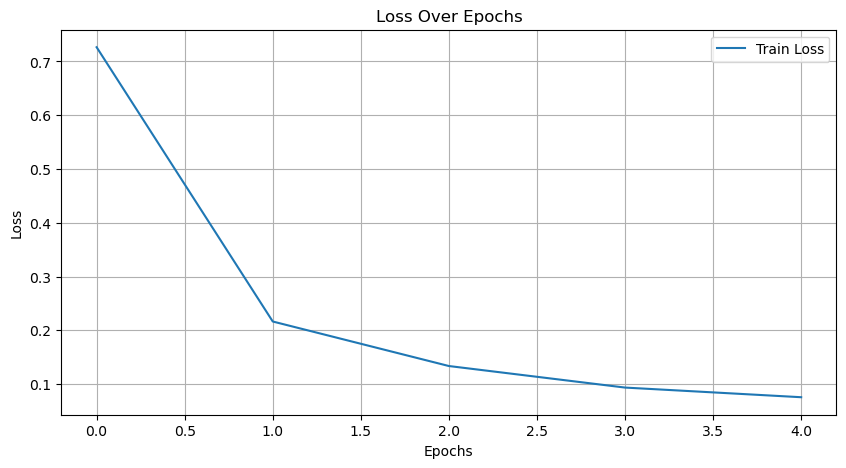

Mean Squared Error on Train Set: 0.06829998981473702


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Converting bool data types to float
bool_columns = [col for col in train_data.columns if train_data[col].dtype == 'bool']
for col in bool_columns:
    train_data[col] = train_data[col].astype(float)
    test_data[col] = test_data[col].astype(float)

# Missing value checking and filling (if not done before)
for col in train_data.columns:
    if train_data[col].isnull().any():
        mean_val = train_data[col].mean()
        train_data[col].fillna(mean_val, inplace=True)
        test_data[col].fillna(mean_val, inplace=True)

#Convert datasets to tensors
X_train = torch.tensor(train_data.drop('Total Exported Value(Crops)', axis=1).values, dtype=torch.float32)
y_train = torch.tensor(train_data['Total Exported Value(Crops)'].values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(test_data.drop('Total Exported Value(Crops)', axis=1).values, dtype=torch.float32)
y_test = torch.tensor(test_data['Total Exported Value(Crops)'].values, dtype=torch.float32).view(-1, 1)

# get country index as tensor
countries_train = torch.tensor(train_data['Country_Index'].values, dtype=torch.long)
countries_test = torch.tensor(test_data['Country_Index'].values, dtype=torch.long)

# Define train loader and test loaders
train_loader = DataLoader(TensorDataset(X_train, countries_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, countries_test, y_test), batch_size=64, shuffle=False)


class MLPModel(nn.Module):
    def __init__(self, num_countries, embedding_dim, input_features):
        super(MLPModel, self).__init__()
        self.embedding = nn.Embedding(num_countries, embedding_dim)
        self.fc1 = nn.Linear(input_features + embedding_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)
        self.relu = nn.ReLU()

    def forward(self, x, countries):
        country_embedding = self.embedding(countries)
        x = torch.cat((x, country_embedding), dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# Model, loss function and optimizer definitions
model = MLPModel(num_countries=len(country_dict), embedding_dim=80, input_features=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import matplotlib.pyplot as plt

# a list holding information of losses for both train and test datas
train_losses = []
test_losses = []

# Model training and saving loss values
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_train_loss = 0
        for data, countries, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(data, countries)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss}')

# Evaluating the model on train data and calculating the loss
def evaluate_model(model, train_loader, criterion):
    model.eval()
    total_train_loss = 0
    with torch.no_grad():
        for data, countries, targets in train_loader:
            outputs = model(data, countries)
            loss = criterion(outputs, targets)
            total_train_loss += loss.item()
    avg_train_loss = total_train_loss / len(train_loader)
    test_losses.append(avg_train_loss)
    return avg_train_loss


train_model(model, train_loader, criterion, optimizer, epochs=5)
#get avg mse value for train data
def avg_evaluate_model(model, train_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data, countries, targets in train_loader:
            outputs = model(data, countries)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(ttrain_loader)



# Plotting training and testing losses
def plot_losses():
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_losses()
mse = avg_evaluate_model(model, train_loader, criterion)
print(f'Mean Squared Error on Train Set: {mse}')




C:\Users\enesk\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\enesk\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([51, 1])) that is different to the input size (torch.Size([51, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/5, Train Loss: 2.2178704142570496
Epoch 2/5, Train Loss: 2.2754054814577103
Epoch 3/5, Train Loss: 1.944373572866122
Epoch 4/5, Train Loss: 1.7899727026621501
Epoch 5/5, Train Loss: 1.4502473796407382


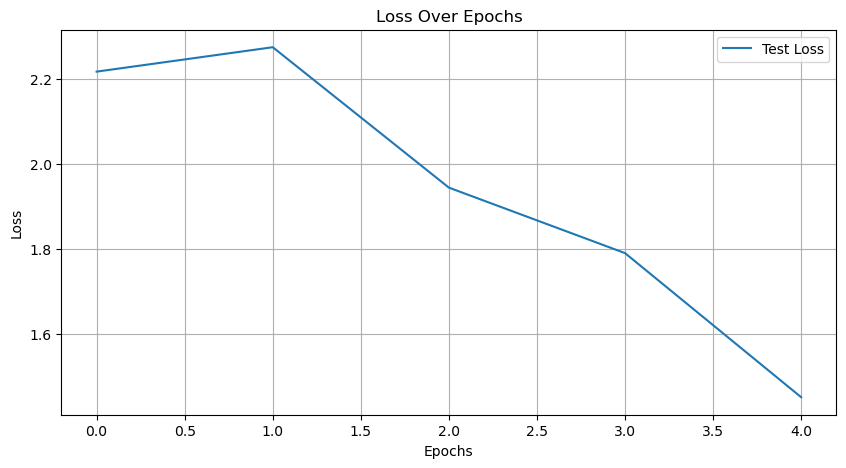

Mean Squared Error on Test Set: 1.2472459549705188


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Converting bool data types to float
bool_columns = [col for col in train_data.columns if train_data[col].dtype == 'bool']
for col in bool_columns:
    train_data[col] = train_data[col].astype(float)
    test_data[col] = test_data[col].astype(float)

# Missing value checking and filling
for col in train_data.columns:
    if train_data[col].isnull().any():
        mean_val = train_data[col].mean()
        train_data[col].fillna(mean_val, inplace=True)
        test_data[col].fillna(mean_val, inplace=True)

# Convert datasets to tensors 
X_train = torch.tensor(train_data.drop('Total Exported Value(Crops)', axis=1).values, dtype=torch.float32)
y_train = torch.tensor(train_data['Total Exported Value(Crops)'].values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(test_data.drop('Total Exported Value(Crops)', axis=1).values, dtype=torch.float32)
y_test = torch.tensor(test_data['Total Exported Value(Crops)'].values, dtype=torch.float32).view(-1, 1)

# get country index as tensor
countries_train = torch.tensor(train_data['Country_Index'].values, dtype=torch.long)
countries_test = torch.tensor(test_data['Country_Index'].values, dtype=torch.long)

# Define train loader and test loadersma
train_loader = DataLoader(TensorDataset(X_train, countries_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, countries_test, y_test), batch_size=64, shuffle=False)


class MLPModel(nn.Module):
    def __init__(self, num_countries, embedding_dim, input_features):
        super(MLPModel, self).__init__()
        self.embedding = nn.Embedding(num_countries, embedding_dim)
        self.fc1 = nn.Linear(input_features + embedding_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)
        self.relu = nn.ReLU()

    def forward(self, x, countries):
        country_embedding = self.embedding(countries)
        x = torch.cat((x, country_embedding), dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# Model, loss function and optimizer definitions
model = MLPModel(num_countries=len(country_dict), embedding_dim=80, input_features=X_test.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import matplotlib.pyplot as plt

# a list holding information of losses for both train and test datasr
train_losses = []
test_losses = []

# Model training and saving loss values
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_train_loss = 0
        for data, countries, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(data, countries)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss}')

# Evaluating the model on test data and calculating test loss
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for data, countries, targets in test_loader:
            outputs = model(data, countries)
            loss = criterion(outputs, targets)
            total_test_loss += loss.item()
    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    return avg_test_loss

# Modelin training
train_model(model, test_loader, criterion, optimizer, epochs=5)
#get avg mse value for test data
def avg_evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data, countries, targets in test_loader:
            outputs = model(data, countries)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(test_loader)



# Plotting training and testing losses
def plot_losses():
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Test Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_losses()
mse = avg_evaluate_model(model, test_loader, criterion)
print(f'Mean Squared Error on Test Set: {mse}')




# The below code provide prediction values for every country

### Then, the information will be used for model output csv file

In [8]:
import pandas as pd
main_ml_dataset=pd.read_csv('new_conversionfile.csv')
main_ml_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Divide train and test datas according to "year"

train_data = main_ml_dataset[main_ml_dataset['Year'] <= 2018]
test_data = main_ml_dataset[main_ml_dataset['Year'] >= 2019]


#Creating and indexing dictionary for country information for embedding layer
country_dict = {country: index for index, country in enumerate(train_data['Country'].unique())}
train_data['Country_Index'] = train_data['Country'].map(country_dict)
test_data['Country_Index'] = test_data['Country'].map(country_dict)
g=test_data
# drop columns will not be involved in the dataset
columns_to_drop = ['Country','Cluster','Year']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

# columns for standartization
columns_standardize = [
    'USD Exchange Rate',  'Crop_Yield_Per_100ha',
    'Fertilizer Use (t)', 'Relative_Year', 'Employment Intensity for Export','Agricultural Index Intensity(LAND)',
    'Agriculture Intensity Index(TRADE)',
    'FDI_Million_USD', 'Agricultural Land (1000 ha)', 
    'Total Exported Value(Crops)', 'All Products Export Quantity', 'Crop Export Quantity'
]

# Standar scale is applied in order to minimize variance on MSE
scaler = StandardScaler()
train_data[columns_standardize] = scaler.fit_transform(train_data[columns_standardize])
test_data[columns_standardize] = scaler.transform(test_data[columns_standardize])
g[columns_standardize] = scaler.transform(g[columns_standardize])

train_data.head(), test_data.head(), country_dict
import torch
import torch.nn as nn
import torch.optim as optim

class MLPModel(nn.Module):
    def __init__(self, num_countries, embedding_dim, input_features, output_features):
        super(MLPModel, self).__init__()
        self.embedding = nn.Embedding(num_countries, embedding_dim)
        self.fc1 = nn.Linear(input_features + embedding_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_features)
        self.relu = nn.ReLU()

    def forward(self, x, countries):
        country_embedding = self.embedding(countries)
        x = torch.cat((x, country_embedding), 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model parameters
num_countries = len(country_dict)  # num of countries mapped 
embedding_dim = 80  # Embedding layer size
input_features = train_data.shape[1] - 1  # number of inputs, which is "34"
output_features = 3  # number of output features (2019, 2020, 2021 predictions)

model = MLPModel(num_countries, embedding_dim, input_features, output_features)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
def train_model(model, train_data, epochs=500):
    for epoch in range(epochs):
        for i, (inputs, countries, targets) in enumerate(train_data):
            optimizer.zero_grad()
            outputs = model(inputs, countries)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

def predict_all_countries(model, country_dict, input_features):
    results = []
    for country_name, index in country_dict.items():
        country_index_tensor = torch.tensor([index])
       
        sample_input = torch.randn(1, 34)  # 34 represents number of features used in the dataset
        with torch.no_grad():
            prediction = model(sample_input, country_index_tensor).numpy().flatten()
        
        # save predictions for years
        for year, value in zip(range(2019, 2022), prediction):
            results.append({
                'Country': country_name,
                'Year': year,
                'Predicted Scaled Value': value
               
            })
    
    return pd.DataFrame(results)

# prediction results for all countries from 2019 to 2021
results_df = predict_all_countries(model, country_dict, input_features)


print(results_df.head())



       Country  Year  Predicted Scaled Value
0  Afghanistan  2019                0.077577
1  Afghanistan  2020               -0.362161
2  Afghanistan  2021               -0.070191
3      Albania  2019               -0.036932
4      Albania  2020               -0.357456


C:\Users\enesk\AppData\Local\Temp\ipykernel_19280\994967093.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Country_Index'] = train_data['Country'].map(country_dict)
C:\Users\enesk\AppData\Local\Temp\ipykernel_19280\994967093.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Country_Index'] = test_data['Country'].map(country_dict)
C:\Users\enesk\AppData\Local\Temp\ipykernel_19280\994967093.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

# below code depicts outcomes from the actual scaled values

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


main_ml_dataset = pd.read_csv('new_conversionfile.csv')


train_data = main_ml_dataset[main_ml_dataset['Year'] <= 2018]
test_data = main_ml_dataset[main_ml_dataset['Year'] >= 2019]


country_dict = {country: index for index, country in enumerate(train_data['Country'].unique())}
train_data['Country_Index'] = train_data['Country'].map(country_dict)
test_data['Country_Index'] = test_data['Country'].map(country_dict)

columns_standardize = [
    'USD Exchange Rate',  'Crop_Yield_Per_100ha',
    'Fertilizer Use (t)', 'Relative_Year', 'Employment Intensity for Export',
    'Agricultural Index Intensity(LAND)', 'Agriculture Intensity Index(TRADE)',
    'FDI_Million_USD', 'Agricultural Land (1000 ha)', 
    'Total Exported Value(Crops)', 'All Products Export Quantity', 'Crop Export Quantity'
]

scaler = StandardScaler()
train_data[columns_standardize] = scaler.fit_transform(train_data[columns_standardize])
test_data[columns_standardize] = scaler.transform(test_data[columns_standardize])


filtered_data = test_data[(test_data['Year'] >= 2019) & (test_data['Year'] <= 2021)]


filtered_data[['Year', 'Total Exported Value(Crops)']]

C:\Users\enesk\AppData\Local\Temp\ipykernel_19280\123287719.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Country_Index'] = train_data['Country'].map(country_dict)
C:\Users\enesk\AppData\Local\Temp\ipykernel_19280\123287719.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Country_Index'] = test_data['Country'].map(country_dict)
C:\Users\enesk\AppData\Local\Temp\ipykernel_19280\123287719.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Year,Total Exported Value(Crops)
19,2019,-0.289619
20,2020,-0.270792
21,2021,-0.266035
41,2019,-0.375888
42,2020,-0.370450
...,...,...
4291,2020,-0.324879
4292,2021,-0.309287
4313,2019,-0.227415
4314,2020,-0.229980


In [10]:
actual_scaled_data=filtered_data[['Country','Year','Total Exported Value(Crops)']]

In [11]:
actual_scaled_data

,Country,Year,Total Exported Value(Crops)
19,Afghanistan,2019,-0.289619
20,Afghanistan,2020,-0.270792
21,Afghanistan,2021,-0.266035
41,Albania,2019,-0.375888
42,Albania,2020,-0.370450
...,...,...,...
4291,Zambia,2020,-0.324879
4292,Zambia,2021,-0.309287
4313,Zimbabwe,2019,-0.227415
4314,Zimbabwe,2020,-0.229980


In [13]:
actual_scaled_data=actual_scaled_data.reset_index()

In [15]:
actual_scaled_data.drop(['index'],axis=1,inplace=True)

In [16]:
actual_scaled_data

,Country,Year,Total Exported Value(Crops)
0,Afghanistan,2019,-0.289619
1,Afghanistan,2020,-0.270792
2,Afghanistan,2021,-0.266035
3,Albania,2019,-0.375888
4,Albania,2020,-0.370450
...,...,...,...
563,Zambia,2020,-0.324879
564,Zambia,2021,-0.309287
565,Zimbabwe,2019,-0.227415
566,Zimbabwe,2020,-0.229980


In [17]:
# Get the matching data by merging by Country and Year
model_outputs = pd.merge(actual_scaled_data, results_df, on=['Country', 'Year'], suffixes=('_Actual', '_Predicted'))

# calculate the average error
model_outputs['Mean Error'] = (model_outputs['Total Exported Value(Crops)'] - model_outputs['Predicted Scaled Value']).abs()



model_outputs.head()

,Country,Year,Total Exported Value(Crops),Predicted Scaled Value,Mean Error
0,Afghanistan,2019,-0.289619,0.077577,0.367196
1,Afghanistan,2020,-0.270792,-0.362161,0.091368
2,Afghanistan,2021,-0.266035,-0.070191,0.195844
3,Albania,2019,-0.375888,-0.036932,0.338956
4,Albania,2020,-0.370450,-0.357456,0.012994


In [18]:
model_outputs.to_csv("new_model_outputs.csv",index=False)

# #----------------------------------------------------------------------#